In [1]:
##### ATOC7500 - example_ftest - Lecture #3
##### Coded by Prof. Jen Kay (CU), Munged Data from Jen Kay/Matt Gentry (ATOC grad student 2019)
##### Last updated: September 9, 2020

### GENERAL SETUP
%matplotlib inline  
# this enables plotting within notebook

import matplotlib   # library for plotting
import matplotlib.pyplot as plt #  later you will type plt.$COMMAND
import numpy as np   # basic math library  you will type np.$STUFF  e.g., np.cos(1)
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
import scipy.stats as stats # imports stats functions https://docs.scipy.org/doc/scipy/reference/stats.html 
import xarray as xr # use for slick netcdf data analysis

In [2]:
### Net Primary Productivity (NPP) from the CESM LE member # 002 during January.
### We want to test if the variance from 1920-1962 differs from the variance from 1963-2005

### load data. 
data = xr.open_dataarray('CESM1LE_member2_January_NPP_1920-2005.nc')

In [3]:
print(data.values)
print(data.year)

[55.25716891 54.40901564 54.85408872 58.07678111 57.06923509 58.14337401
 57.86437693 56.93263814 56.83021118 57.68439684 55.02534924 54.47261893
 55.63816812 56.90375987 55.1546899  54.41622513 57.094798   55.3343528
 54.85715263 56.93265931 56.93448466 54.21836168 54.44670608 55.36049126
 56.9042067  57.4392063  56.48902136 57.53348856 54.34927224 56.68423873
 53.6322274  58.14262375 56.36921389 54.98957397 55.9635466  57.17790515
 56.39827926 57.08460811 55.70532468 56.42455764 55.74109417 58.90495578
 57.28988304 53.81693862 55.53062167 55.70858376 55.96727168 57.7977269
 55.88952007 57.49267461 56.37403486 56.70749111 57.82754136 58.25746935
 56.47475058 55.8204165  56.85426853 58.37876724 54.68072814 56.68467623
 57.14725037 56.91062085 55.41868714 55.95220599 58.39894422 55.42444327
 55.77565653 57.38742099 56.11272768 55.83088953 58.54078489 60.16061359
 54.88946453 55.44013185 54.34073669 55.41184059 55.82604854 59.25335102
 56.41270352 56.15134028 54.25299838 58.52138547 55.0

(86,)
(86,)


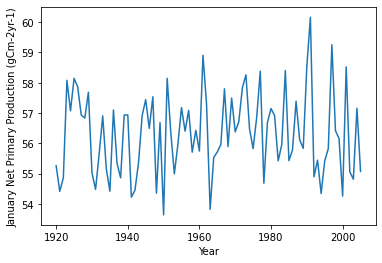

In [4]:
### Let's make a plot of the data... Remember "Look at your data"!!
year=data.year
print(year.shape)
print(data.shape)

plt.plot(year, data);
plt.xlabel('Year');
plt.ylabel('January Net Primary Production (gCm-2yr-1)');

In [5]:
## We want to test if the variance for 1920-1962 differs from the variance from 1963-2006
## Create two variables (data1, data2) to calculate statistics from these two periods

data1=data.sel(year=slice(1920,1962))
data2=data.sel(year=slice(1963,2005))
print(data1.year)
print(data2.year)
print(data1.shape)
print(data2.shape)

<xarray.DataArray 'year' (year: 43)>
array([1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962])
Coordinates:
  * year     (year) int64 1920 1921 1922 1923 1924 ... 1958 1959 1960 1961 1962
<xarray.DataArray 'year' (year: 43)>
array([1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005])
Coordinates:
  * year     (year) int64 1963 1964 1965 1966 1967 ... 2001 2002 2003 2004 2005
(43,)
(43,)


In [6]:
### calculate mean, std, and N for each period
sample_mean1=data1.mean()
sample_mean2=data2.mean()
sample_std1=data1.std()
sample_std2=data2.std()
N1=len(data1)
N2=len(data2)
print('Sample mean 1920-1963: ',np.round(sample_mean1.values,1))
print('Sample mean 1963-2006: ',np.round(sample_mean2.values,1))
print('Sample std 1920-1963: ',np.round(sample_std1.values,1))
print('Sample std 1963-2006: ',np.round(sample_std2.values,1))
print('Sample N1 1920-1963: ',np.round(N1,1))
print('Sample N2 1963-2006: ',np.round(N2,1))

Sample mean 1920-1963:  56.2
Sample mean 1963-2006:  56.4
Sample std 1920-1963:  1.3
Sample std 1963-2006:  1.4
Sample N1 1920-1963:  43
Sample N2 1963-2006:  43


In [7]:
## First we will test the python function to make sure we get the same value as in the f-table in Barnes.  
## F-distribution critical value for alpha=0.05, numerator DF=denominator DF = 60.  
## we should get fcrit=1.5343.  Looks good!
fcrit_test = stats.f.ppf(q = 0.95, dfn = 60, dfd = 60)
print(np.round(fcrit_test,4))

fcrit_test = stats.f.ppf(q = 0.95, dfn = 10, dfd = 500)
print(np.round(fcrit_test,4))

1.5343
1.8496


In [8]:
### Hypothesis testing
# Step #1: State significance level. alpha=0.05; 95% confidence
# Step #2: Null Hypothesis -- The standard deviation for period 1 (1920-1963) and period 2 (1963-2006) are the same.
# Step #3: We will use the f-statistic.  We will assume data1 and data2 come from normal populations having the same
# true variance.
# Step #4: Find critical value to exceed to reject the null hypothsis (fcrit)
# Now find the critical f value for our problem.  If our calculated F statistic is less than fcrit - 
# we fail to reject our null hypothesis
fcrit = stats.f.ppf(q = 0.95, dfn = N1-1, dfd = N2-1)
print(np.round(fcrit,4))
# Step #5: Calculate f statistic and Assess findings. 
f=sample_std1**2/sample_std2**2
print(np.round(f.values,4))
print('SUMMARY: f<fcrit so we cannot reject our null hypothesis that period1 and period2 have the same standard deviation')

1.671
0.8463
SUMMARY: f<fcrit so we cannot reject our null hypothesis that period1 and period2 have the same standard deviation


In [9]:
## Code to read in and better document Matt's originally provided netcdf files
## (For Reference Only... Shows how to write a netcdf file with attributes)

#data1 = xr.open_dataarray('CESMLE_mem2_jan_NPP_1920-1963.nc')
#data2 = xr.open_dataarray('CESMLE_mem2_jan_NPP_1963-2005.nc')
#data = xr.concat([data1, data2], dim='time')
#data1=data1*100000 ## convert from molsec-1 to gCm-2yr-1
#data2=data2*100000 ## convert from molsec-1 to gCm-2yr-1
#data=data*100000 ## convert from molsec-1 to gCm-2yr-1

## Look at the time stamp of the first and last data point.... 
#print(data.time[0])
#print(data.time[-1])
##Why are the data for February 1 instead of January 1?   
##Well, it turns out the model writes the data at the end of the time interval.  
## So January means get written on February 1.  Good to know :)!  
##Let's just include the year as a coordinate variable.

## Save the data to a netcdf file 
#year=np.arange(1920,2006,1)
### Save to netcdf with coordinate arrays and units
#outpath=''
#data_vars={'NPP': (['year'],  data,{'units': 'gCm-2yr-1','long_name':'Net Primary Productivity'})}
#ds = xr.Dataset(data_vars,coords={'year':(['year'],year)})
#ds.attrs['control_name']='CESM1 Large Ensemble Member #2, doi: 10.1175/BAMS-D-13-00255.1'
#ds.attrs['datamungers']='Jennifer Kay/Matt Gentry (CU-Boulder)'
#fname=outpath+'CESM1LE_member2_January_NPP_1920-2005.nc'
#ds.to_netcdf(fname)